# Data Preparation

In [52]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats
import scipy.stats as stats  # Import for correlation calculation

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# dataset downloaded from https://www.kaggle.com/code/sratra/housing-data

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kelas Work/Project/Case Study 2/train_house.csv')
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [55]:
# Drop variabel NaN
# Untuk drop variabel NaN, maka pertama-tama perlu dicek apakah ada variabel dengan nilai NaN
house.isnull() # Cek keberadaan NaN

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


Analisa cek NaN dengan house.isnull:
Sekilas terlihat beberapa kolom dengan nilai NaN, seperti PoolQC, Fence dan MiscFeature. Selanjutnya perlu dilakukan perhitungan berapa persen nilai NaN dalam suatu kolom.

In [56]:
# Persentase nilai NaN
total = house.isnull().sum().sort_values (ascending = False)
percent = (house.isnull().sum() / house.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent], axis = 1, keys = ['total','percent'])
missing_data.head(20)

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


Terdapat 19 variabel dengan nilai NaN di dalamnya. Berikutnya, variabel-variabel ini akan dibuang.

In [57]:
house_clean = house.dropna (axis = 1) # dibuat variabel baru untuk mencegah variabel house ter-overwrite
house_clean

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Setelah dilakukan house.dropna, maka sesuai perhitungan, dataset awal berukuran 1460 rows × 81 columns, setelah dropna, menjadi 1460 rows × 62 columns

In [58]:
# Memisahkan data menjadi numerikal & kategorikal
# Mendapatkan data numerik
cols = house_clean.columns
num_cols = house_clean._get_numeric_data().columns
house_numeric = house_clean [num_cols]
house_numeric.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


Analisa:
1. Terdapat 38 variabel dengan data numerik.
2. Asumsi sejauh ini yaitu semua data adalah numerik, tidak ada kategori ataupun ordinal

In [59]:
house_categorical = house_clean.drop(num_cols,axis = 1)
house_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


Analisa:
1. Terdapat 43 kolom dengan data kategorikal

# 1D Visualization

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual`

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut

       AllPub	All public Utilities (E,G,W,& S)
       NoSeWa	Electricity and Gas Only

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

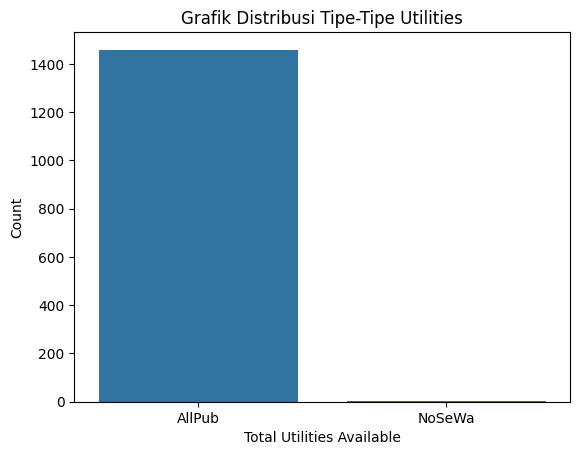

In [60]:
sns.barplot (x = house_categorical ['Utilities'].value_counts().index, y = house_categorical['Utilities'].value_counts (normalize = False))
plt.title ("Grafik Distribusi Tipe-Tipe Utilities") # Memberi judul pada grafik
plt.xlabel('Total Utilities Available')
plt.ylabel('Count')

house_categorical['Utilities'].value_counts()

Analisa:
1. Hampir 100% properti memiliki fasilitas AllPub yaitu All Public Utilities (E, G, W, S)
2. Fasilitas NoSeWa ditemukan pada sangat sedikit properti
3. Berhubung hampir 100% properti memiliki fasilitas AllPub, dan hanya 1 yang tidak berfasilitas AllPub, maka, varian yang satu ini dapat diabaikan saja.

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

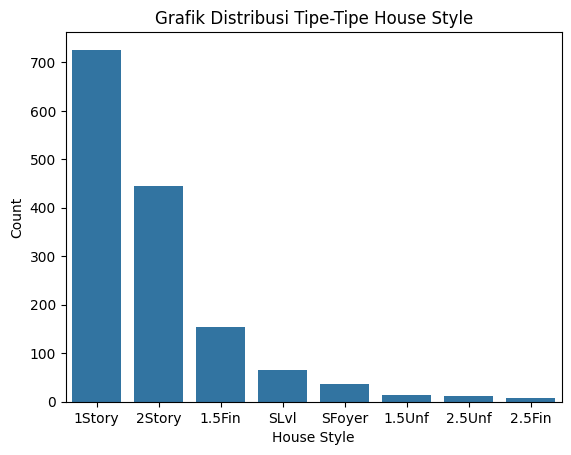

In [61]:
sns.barplot (x = house_categorical ['HouseStyle'].value_counts().index, y = house_categorical['HouseStyle'].value_counts (normalize = False))
plt.title ("Grafik Distribusi Tipe-Tipe House Style") # Memberi judul pada grafik
plt.xlabel('House Style')
plt.ylabel('Count')

house_categorical['HouseStyle'].value_counts()

Analisa:
1. Rumah dengan 1 lantai mendominasi properti di suatu kawasan tertentu, disusul dengan 2 lantai dan 1,5 lantai finished.
2. Diperlukan penyelidikan lebih lanjut mengapa rumah dengan 1 lantai populer di kawasan tertentu. Apakah terkait dengan kepadatan penduduk, jumlah orang dalam satu keluarga ataupun daya beli masyarakatnya.

### ExterQual

ExterQual: Kualitas material eksterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

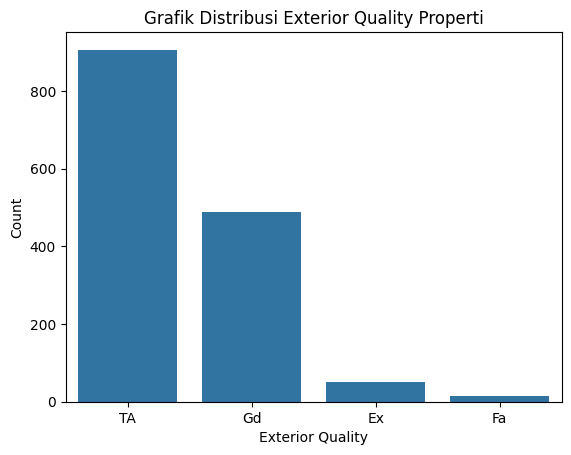

In [62]:
sns.barplot (x = house_categorical ['ExterQual'].value_counts().index, y = house_categorical['ExterQual'].value_counts (normalize = False))
plt.title ("Grafik Distribusi Exterior Quality Properti") # Memberi judul pada grafik
plt.xlabel('Exterior Quality')
plt.ylabel('Count')

house_categorical['ExterQual'].value_counts()

Analisa:
1. Sebagian besar properti yang dijual memiliki kondisi eksterior dengan kategori average/typical atau biasa-biasa saja, disusul dengan kondisi Good atau baik.
2. Terdapat sedikit sekali rumah dengan kualitas Fair atau standar terendah dalam kategori ini.
3. Tidak ada penjelasan spesifik mengenai kategori excellent dan good. Apabila keduanya sama-sama dalam kategori baik, mungkin ada hubungannya dengan harga jual sehingga hanya segelintir orang dapat membelinya.

#### **Analisis tentang variabel kategorikal**

1. Dengan memperhatikan ketiga variabel, yaitu, Utilities, HouseStyle dan ExterQual, makan dapat disimpulkan bahwa, apapun kualitas exterior dan jumlah lantai, fasilitas yang ditawarkan telah mencakup keseluruhan yaitu E, G, W dan S.
2. Properti 1 lantai dengan kualitas eksterior biasa-biasa saja (typical) mendominasi suatu kawasan tertentu

3. Mengapa properti yang dijual mayoritas 1 lantai dan berkualitas typical ?
4. Apakah ada hubungannya dengan harga jual, daya beli masyarakat dan kawasan tempat properti tersebut dijual?

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

Median:  163000.0
Mean:  180921.19589041095
Std Dev:  79442.50288288662


<function matplotlib.pyplot.show(close=None, block=None)>

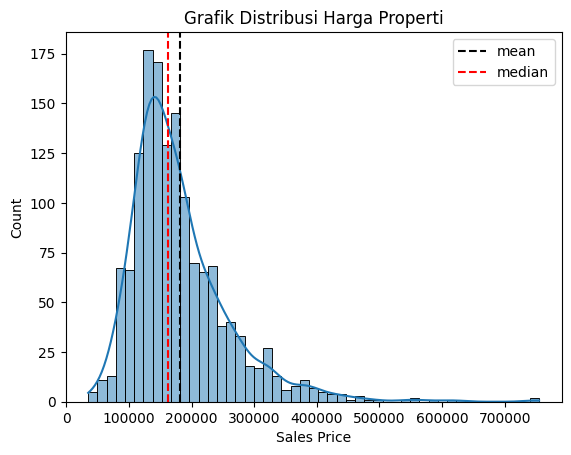

In [63]:
x = house_numeric['SalePrice']
sns.histplot (x, kde = True)
plt.title ("Grafik Distribusi Harga Properti") # Memberi judul pada grafik
plt.xlabel('Sales Price')
plt.ylabel('Count')
line1 = plt.axvline(x.mean(),color = "k", linestyle = "--", label = "mean")
line2 = plt.axvline(x.median(),color = "r",linestyle = "--", label = "median")
first_legend = plt.legend(handles = [line1,line2],loc=1)
print ("Median: ", x.median())
print ("Mean: ", x.mean())
print ("Std Dev: ", x.std())
plt.show
# Median
# Mean
# Std Dev

#### **Analisis tentang variabel `SalePrice`**
1. Grafik histogram SalePrice bersifat skew kanan, dimana nilai Mean lebih besar dr Median. Hal ini juga berarti lebih banyak rumah yang dijual dengan harga yang lebih rendah dibandingkan dengan harga tinggi.
2. Harga rumah umumnya lebih banyak di angka 100000 - 200000
3. Rentang data terlalu lebar, mulai dari 0 hingga 700000

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

Median:  1464.0
Mean:  1515.463698630137
Std Dev:  525.4803834232025


<function matplotlib.pyplot.show(close=None, block=None)>

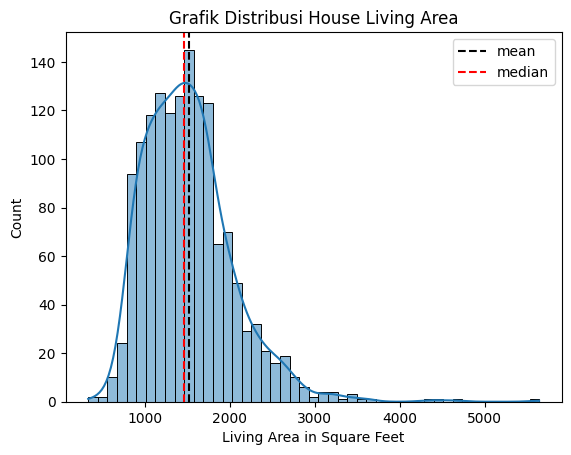

In [64]:
### Tulis kode Anda di sini
x = house_numeric['GrLivArea']
sns.histplot (x, kde = True)
plt.title ("Grafik Distribusi House Living Area") # Memberi judul pada grafik
plt.xlabel('Living Area in Square Feet')
plt.ylabel('Count')

line1 = plt.axvline(x.mean(),color = "k", linestyle = "--", label = "mean")
line2 = plt.axvline(x.median(),color = "r",linestyle = "--", label = "median")
first_legend = plt.legend(handles = [line1,line2],loc=1)
print ("Median: ", x.median())
print ("Mean: ", x.mean())
print ("Std Dev: ", x.std())
plt.show
# Median
# Mean
# Std Dev

#### **Analisis tentang variabel `GrlivArea`**
1. Barplot diatas bersifat skew kanan
2. Luas area properti dengan jumlah terbanyak berkisar antara 1000Squarefeet hingga 1500 Squarefeet
3. Mean yang terdisplay dirasa kurang akurat dan rentan outlier berhubung rentang luas area terlalu lebar dari 0 hingga diatas 5000



### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

Median:  480.0
Mean:  472.9801369863014
Std Dev:  213.80484145338042


<function matplotlib.pyplot.show(close=None, block=None)>

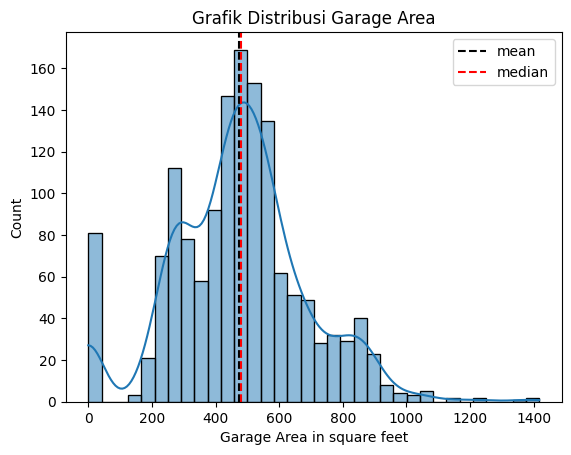

In [65]:
x = house_numeric['GarageArea']
sns.histplot (x, kde = True)
plt.title ("Grafik Distribusi Garage Area") # Memberi judul pada grafik
plt.xlabel('Garage Area in square feet')
plt.ylabel('Count')

line1 = plt.axvline(x.mean(),color = "k", linestyle = "--", label = "mean")
line2 = plt.axvline(x.median(),color = "r",linestyle = "--", label = "median")
first_legend = plt.legend(handles = [line1,line2],loc=1)
print ("Median: ", x.median())
print ("Mean: ", x.mean())
print ("Std Dev: ", x.std())
plt.show# Median
# Mean
# Std Dev

#### **Analisis tentang variabel `GarageArea`**

1. Data sangat imbalance
2. terdapat nilai 0 yang cukup banyak. Hal ini mungkin karena tidak semua properti yang mempunyai garasi
3. untuk membuat distribusi data menjadi lebih normal, mungkin dapat mengabaikan faktor rumah tanpa garasi Dengan kata lain, hanya memperhitungkan rumah dengan garasi.
4. Variasi luas garasi terlalu banyak. Mungkin, ukuran garasi disesuaikan dengan fungsinya. Garasi di US berbeda dengan garasi di Indonesia. Mungkin ada yang digunakan untuk menyimpan kendaraan berupa mobil. Atau mungkin sang pemilik mempunyai pesawat yang disimpan dalam garasi. Kemungkinan juga digunakan untuk workshop ataupun hanya digunakan untuk menyimpan barang-barang.

Median (filtered):  484.0
Mean: (filtered) 500.76214648295866
Std Dev: (filtered) 185.68051979433164


<function matplotlib.pyplot.show(close=None, block=None)>

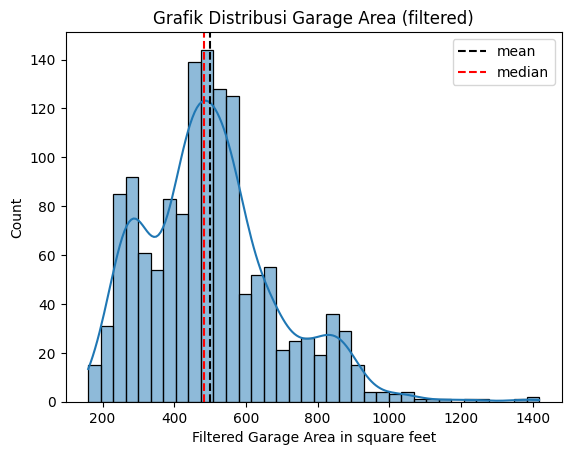

In [66]:
GarageFiltered = house_numeric[house_numeric['GarageArea'] > 0]

x = GarageFiltered['GarageArea']
sns.histplot (x, kde = True)
plt.title ("Grafik Distribusi Garage Area (filtered)") # Memberi judul pada grafik
plt.xlabel('Filtered Garage Area in square feet')
plt.ylabel('Count')

line1 = plt.axvline(x.mean(),color = "k", linestyle = "--", label = "mean")
line2 = plt.axvline(x.median(),color = "r",linestyle = "--", label = "median")
first_legend = plt.legend(handles = [line1,line2],loc=1)
print ("Median (filtered): ", GarageFiltered['GarageArea'].median())
print ("Mean: (filtered)", GarageFiltered['GarageArea'].mean())
print ("Std Dev: (filtered)", GarageFiltered['GarageArea'].std())
plt.show# Median
# Mean
# Std Dev

## Pemrosesan Data Variabel Numerikal

Median:  5.212187604403958
Mean:  5.221978956475628
Std Dev:  0.17347974217176834


<function matplotlib.pyplot.show(close=None, block=None)>

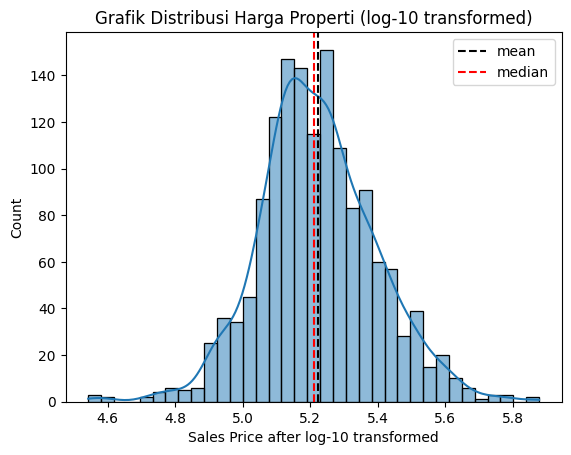

In [67]:
# Transformasi log-10 SalePrice

x = np.log10(house_numeric["SalePrice"])
sns.histplot (x,kde = True)
plt.title ("Grafik Distribusi Harga Properti (log-10 transformed)") # Memberi judul pada grafik
plt.xlabel('Sales Price after log-10 transformed')
plt.ylabel('Count')

line1 = plt.axvline(x.mean(),color = "k", linestyle = "--", label = "mean")
line2 = plt.axvline(x.median(),color = "r",linestyle = "--", label = "median")
first_legend = plt.legend(handles = [line1,line2],loc=1)
print ("Median: ", x.median())
print ("Mean: ", x.mean())
print ("Std Dev: ", x.std())
plt.show
# Median
# Mean
# Std Dev

Median:  3.165541076722373
Mean:  3.156354310389778
Std Dev:  0.14485910869663862


<function matplotlib.pyplot.show(close=None, block=None)>

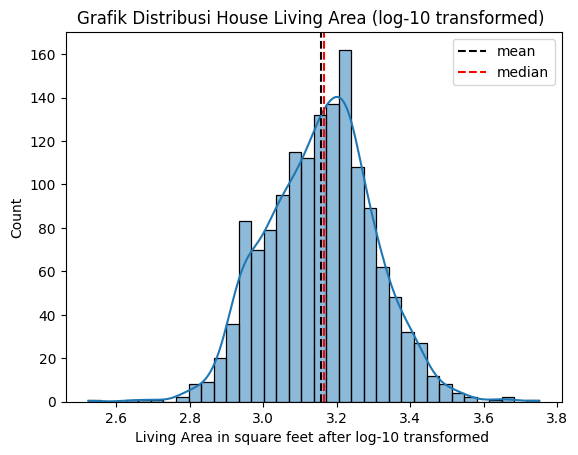

In [68]:
# Transformasi log-10 GrLivArea

x = np.log10(house_numeric["GrLivArea"])
sns.histplot (x,kde = True)
plt.title ("Grafik Distribusi House Living Area (log-10 transformed) ") # Memberi judul pada grafik
plt.xlabel('Living Area in square feet after log-10 transformed ')
plt.ylabel('Count')

line1 = plt.axvline(x.mean(),color = "k", linestyle = "--", label = "mean")
line2 = plt.axvline(x.median(),color = "r",linestyle = "--", label = "median")
first_legend = plt.legend(handles = [line1,line2],loc=1)
print ("Median: ", x.median())
print ("Mean: ", x.mean())
print ("Std Dev: ", x.std())
plt.show# Median
# Mean
# Std Dev

Median:  2.6848453616444123
Mean:  2.6696154158200915
Std Dev:  0.16427840573730199


<function matplotlib.pyplot.show(close=None, block=None)>

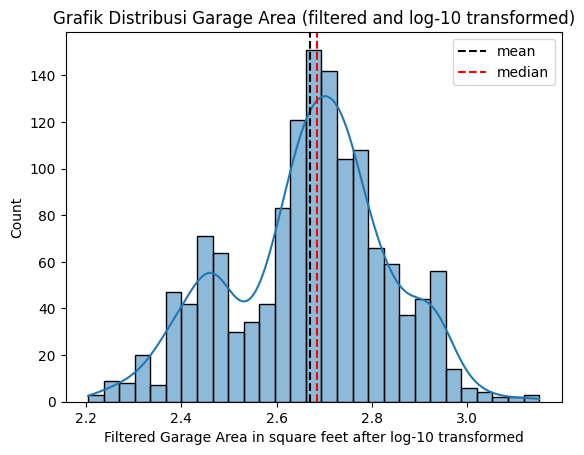

In [69]:
# Transformasi log-10 GarageArea

#x = house_numeric['GarageArea'][house_numeric['GarageArea'] > 0]
x = np.log10(house_numeric['GarageArea'][house_numeric['GarageArea'] > 0])
sns.histplot (x,kde = True)
plt.title ("Grafik Distribusi Garage Area (filtered and log-10 transformed)") # Memberi judul pada grafik
plt.xlabel('Filtered Garage Area in square feet after log-10 transformed')
plt.ylabel('Count')

line1 = plt.axvline(x.mean(),color = "k", linestyle = "--", label = "mean")
line2 = plt.axvline(x.median(),color = "r",linestyle = "--", label = "median")
first_legend = plt.legend(handles = [line1,line2],loc=1)
print ("Median: ", x.median())
print ("Mean: ", x.mean())
print ("Std Dev: ", x.std())
plt.show
# Median
# Mean
# Std Dev

#### **Penjelasan dan analisis tentang pemrosesan data**

* [*tulis penjelasan dan analisis Anda di sini*]

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

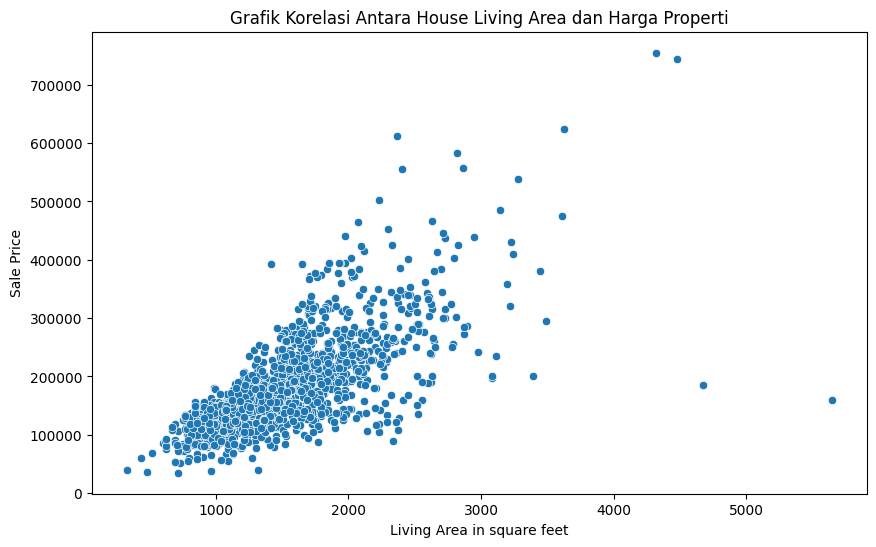

In [70]:
plt.figure(figsize=(10,6))
sns.scatterplot (y = "SalePrice", x = "GrLivArea", data = house_numeric)
plt.title("Grafik Korelasi Antara House Living Area dan Harga Properti")
plt.xlabel('Living Area in square feet')
plt.ylabel('Sale Price')

plt.show()

Pearson Correlation Coefficient: PearsonRResult(statistic=0.7086244776126522, pvalue=4.518033646776417e-223)


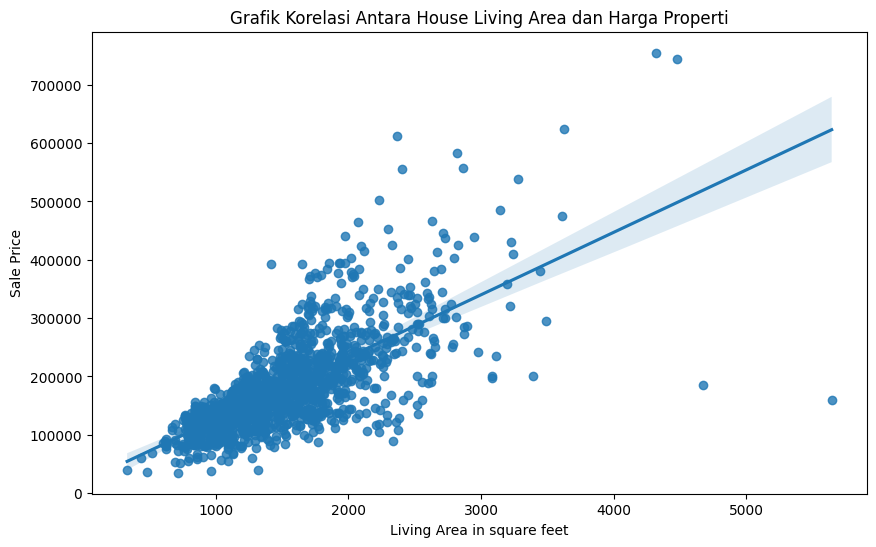

In [71]:
plt.figure(figsize=(10,6))

sns.regplot (x = "GrLivArea", y = "SalePrice", data = house_numeric)
plt.title("Grafik Korelasi Antara House Living Area dan Harga Properti")
plt.xlabel('Living Area in square feet')
plt.ylabel('Sale Price')

gr_liv_area = house_numeric["GrLivArea"]
sale_price = house_numeric["SalePrice"]

correlation = stats.pearsonr (gr_liv_area, sale_price)
print("Pearson Correlation Coefficient:", correlation)
plt.show()

Analisa:
Berdasarkan hasil perhitungan koefisien Korelasi Pearson sebesar 0.7086244776126522, maka secara teori, GrLivArea dan SalePrice berkorelasi positif cukup kuat karena nilai r berada dalam rentang 0 < r < 1 dan cenderung mendekati nilai 1.
Mengacu pada hasil koefisien korelasi, dapat disimpulkan bahwa Semakin tinggi GrLivArea, maka semakin tinggi juga SalePrice.

# `GarageArea` dengan `SalePrice`

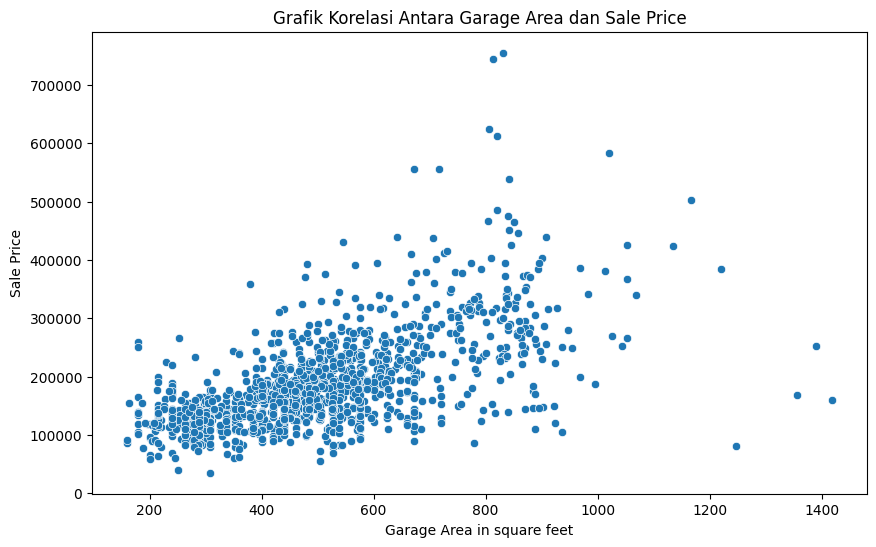

In [72]:
plt.figure(figsize=(10,6))

sns.scatterplot (x = "GarageArea", y = "SalePrice", data = GarageFiltered)
plt.title("Grafik Korelasi Antara Garage Area dan Sale Price")
plt.xlabel('Garage Area in square feet')
plt.ylabel('Sale Price')

plt.show()

Pearson Correlation Coefficient: PearsonRResult(statistic=0.6084052829168348, pvalue=2.0850476172658775e-140)


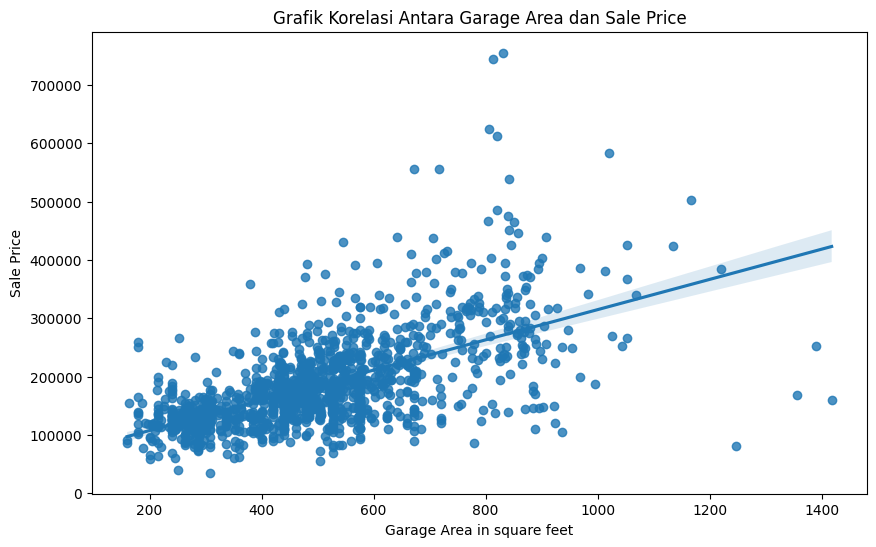

In [73]:
plt.figure(figsize=(10,6))

sns.regplot (x = "GarageArea", y = "SalePrice", data = GarageFiltered)
plt.title("Grafik Korelasi Antara Garage Area dan Sale Price")
plt.xlabel('Garage Area in square feet')
plt.ylabel('Sale Price')

garage_area = GarageFiltered["GarageArea"]
sale_price = GarageFiltered["SalePrice"]

correlation = stats.pearsonr (garage_area, sale_price)
print("Pearson Correlation Coefficient:", correlation)

plt.show()

Analisa: Berdasarkan hasil perhitungan koefisien Korelasi Pearson antara GarageArea dan SalePrice, sebesar 0.6084052829168348, maka GarageArea dan SalePrice berkorelasi positif cukup kuat. Meskipun demikian, angka 0.6084052829168348 bukanlah angka yang sangat mendekati nilai 1, oleh karena itu, kekuatan korelasi ini masih dalam taraf sedang.
Secara visual pun, titik2 scatterplot tersebar secara divergen jauh dari keberadaan garis regresi.

Mengacu pada hasil koefisien korelasi, dapat disimpulkan bahwa Semakin tinggi GarageArea, maka semakin tinggi juga SalePrice



#### **Hipotesis tentang hubungan antar-variabel**

1. Scatterplot GrLivArea dengan SalePrice berbanding lurus, dengan kata lain, semakin luas area properti, makan semakin tinggi harga jual nya

2. Scatterplot GarageArea dengan SalePrice berbanding lurus, artinya, semakin besar garasi yang dimiliki, makan semakin tinggi harga jualnya.
Terdapat beberapa data yang menunjukkan nilai 0 pada GarageArea, karena, mungkin properti tersebut tidak memiliki garasi.

3. Beberapa rumah yang tidak memiliki garasi (GarageArea = 0), harganya ada dalam rentang maksimal 200000, tidak setinggi properti dengan garasi.